In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
from matplotlib import pylab
import seaborn as sns
%matplotlib inline

In [30]:
df=pd.read_csv('City_MedianListingPrice_AllHomes.csv')
df=df.set_index('SizeRank')
df.head()

,RegionName,State,Metro,CountyName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
SizeRank,,,,,,,,,,,,,,,,,,,,,
1,New York,NY,New York,Queens,NaN,NaN,NaN,NaN,NaN,NaN,...,709000.0,715000.0,718800.0,699000.0,699000.0,716000.0,725000.0,719000.0,715000.0,735000.0
2,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,...,690000.0,699000.0,699000.0,699000.0,699000.0,699000.0,709000.0,699900.0,704000.0,708950.0
3,Chicago,IL,Chicago,Cook,NaN,NaN,NaN,NaN,NaN,NaN,...,275000.0,275000.0,270000.0,269000.0,270000.0,269900.0,265000.0,250000.0,255000.0,275000.0
4,Houston,TX,Houston,Harris,NaN,NaN,NaN,NaN,NaN,NaN,...,329900.0,330000.0,329000.0,329000.0,323990.0,317375.0,315000.0,309995.0,301990.0,309900.0
5,Philadelphia,PA,Philadelphia,Philadelphia,NaN,NaN,NaN,NaN,NaN,NaN,...,159900.0,159900.0,156900.0,150000.0,152000.0,158950.0,150000.0,149900.0,150000.0,150000.0


In [41]:
#total change from 2010-01 to 2017-02
df['Total Change'] = df.loc[:,'2017-02'] - df.loc[:,'2010-01']
df['Percent Change'] = (df.loc[:,'2017-02'] - df.loc[:,'2010-01']) / df.loc[:,'2010-01']
#Last one year change starting from 2016-02 to 2017-02
df['Year Change'] = df.loc[:,'2017-02'] - df.loc[:,'2016-02']
df['Year Percent Change'] = (df.loc[:,'2017-02'] - df.loc[:,'2016-02']) / df.loc[:,'2016-02']

In [43]:
df = df.fillna(0)

In [4]:
def plotr(data, group, column, bins=100):
    plot = df.groupby(group)[column].mean().plot(kind='hist', bins=bins)
    (mu, sigma) = norm.fit(df[column])
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=2)
    
    plt.title('Mean {} Grouped by {}'.format(column, group))
    plt.xlabel(column)
    plt.ylabel('Numer of Occurrences')
    
    mn = df[column].mean()
    plt.axvline(mn, color='r', linestyle='dashed', linewidth=1, label='mean')
    plt.legend()
    return plot

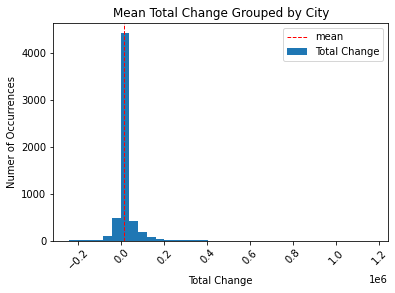

In [29]:
#Intialization of bin
bins=35
#Plotting histogram plot
plot = df.groupby('RegionName')['Total Change'].mean().plot(kind='hist', bins=bins)
#Here i used Fit a normal distribution to the data # took help of stackoverflow
(mu, sigma) = norm.fit(df['Total Change'].astype(int))
#Used above normal distribution to plot it.
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=5)
#Set the title
plt.title('Mean Total Change Grouped by City')
#Set xlabel
plt.xlabel('Total Change')
#Set ylabel
plt.ylabel('Numer of Occurrences')
mn = df['Total Change'].mean()
plt.axvline(mn, color='r', linestyle='dashed', linewidth=1, label='mean')
plt.legend()
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)


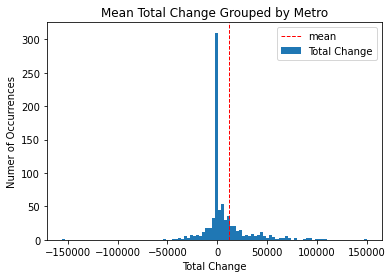

In [35]:
bins=100
#Plotting histogram plot
plot = df.groupby('Metro')['Total Change'].mean().plot(kind='hist', bins=bins)
#Here i used Fit a normal distribution to the data # took help of stackoverflow
(mu, sigma) = norm.fit(df['Total Change'].astype(int))
#Used above normal distribution to plot it.
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
#Set the title
plt.title('Mean Total Change Grouped by Metro')
#Set xlabel
plt.xlabel('Total Change')
#Set ylabel
plt.ylabel('Numer of Occurrences')
mn = df['Total Change'].mean()
plt.axvline(mn, color='r', linestyle='dashed', linewidth=1, label='mean')
plt.legend()
# plotr(df, 'Metro', 'Total Change',bins=50)

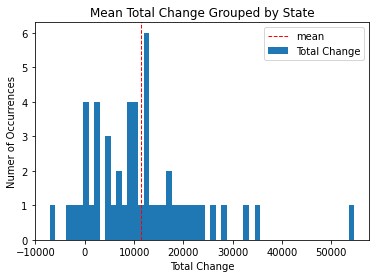

In [36]:
bins=55
#Plotting histogram plot
plot = df.groupby('State')['Total Change'].mean().plot(kind='hist', bins=bins)
#Here i used Fit a normal distribution to the data # took help of stackoverflow
(mu, sigma) = norm.fit(df['Total Change'].astype('int'))
#Used above normal distribution to plot it.
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
#Set the title
plt.title('Mean Total Change Grouped by State')
#Set xlabel
plt.xlabel('Total Change')
#Set ylabel
plt.ylabel('Numer of Occurrences')
mn = df['Total Change'].mean()
plt.axvline(mn, color='r', linestyle='dashed', linewidth=1, label='mean')
plt.legend()